In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

import random

Using TensorFlow backend.


# Load Dataset

(6000, 90, 90, 1) (6000, 4)


C:\anaconda3\envs\tf2.0-gpu\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


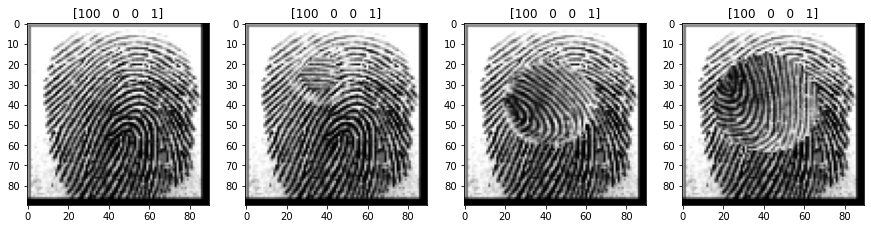

In [2]:
x_real = np.load('dataset2/x_real.npy').reshape(6000,90,90,1)
y_real = np.load('dataset2/y_real.npy')
x_easy = np.load('dataset2/x_easy.npy').reshape(-1,90,90,1)
y_easy = np.load('dataset2/y_easy.npy')
x_medium = np.load('dataset2/x_medium.npy').reshape(-1,90,90,1)
y_medium = np.load('dataset2/y_medium.npy')
x_hard = np.load('dataset2/x_hard.npy').reshape(-1,90,90,1)
y_hard = np.load('dataset2/y_hard.npy')

print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)
plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)
plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)
plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')

# Train Test Split

In [3]:
x_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)

x_train, x_val, label_train, label_val = train_test_split(x_data, label_data, test_size=0.1)

print(x_data.shape, label_data.shape)
print(x_train.shape, label_train.shape)
print(x_val.shape, label_val.shape)

(49270, 90, 90, 1) (49270, 4)
(44343, 90, 90, 1) (44343, 4)
(4927, 90, 90, 1) (4927, 4)


# Preview Augmentation

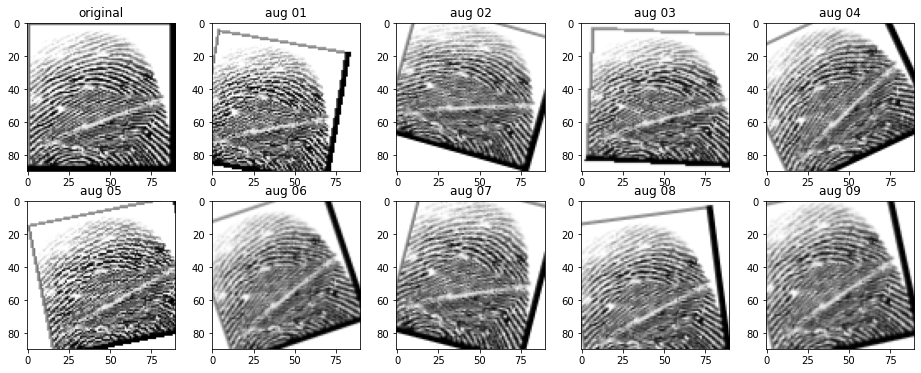

In [4]:
augs = [x_data[40000]] * 9

seq = iaa.Sequential([
    # blur images with a sigma of 0 to 0.5
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        # scale images to 90-110% of their size, individually per axis
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        # translate by -10 to +10 percent (per axis)
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        # rotate by -30 to +30 degrees
        rotate=(-30, 30),
        # use nearest neighbour or bilinear interpolation (fast)
        order=[0, 1],
        # if mode is constant, use a cval between 0 and 255
        cval=255
    )
], random_order=True)

augs = seq.augment_images(augs)

plt.figure(figsize=(16, 6))
plt.subplot(2, 5, 1)
plt.title('original')
plt.imshow(x_data[40000].squeeze(), cmap='gray')
for i, aug in enumerate(augs):
    plt.subplot(2, 5, i+2)
    plt.title('aug %02d' % int(i+1))
    plt.imshow(aug.squeeze(), cmap='gray')

# Make Label Dictionary Lookup Table

In [11]:
label_real_dict = {}

for i, y in enumerate(y_real):
    key = y.astype(str)
    key = ''.join(key).zfill(6)
    print(key)
    label_real_dict[key] = i

100001
100004
100002
100003
100000
100011
100014
100012
100013
100010
101001
101004
101002
101003
101000
101011
101014
101012
101013
101010
102001
102004
102002
102003
102000
102011
102014
102012
102013
102010
103101
103104
103102
103103
103100
103111
103114
103112
103113
103110
104001
104004
104002
104003
104000
104011
104014
104012
104013
104010
105001
105004
105002
105003
105000
105011
105014
105012
105013
105010
106001
106004
106002
106003
106000
106011
106014
106012
106013
106010
107001
107004
107002
107003
107000
107011
107014
107012
107013
107010
108001
108004
108002
108003
108000
108011
108014
108012
108013
108010
109101
109104
109102
109103
109100
109111
109114
109112
109113
109110
010001
010004
010002
010003
010000
010011
010014
010012
010013
010010
110101
110104
110102
110103
110100
110111
110114
110112
110113
110110
111001
111004
111002
111003
111000
111011
111014
111012
111013
111010
112001
112004
112002
112003
112000
112011
112014
112012
112013
112010
113001
113004
113002

371010
372001
372004
372002
372003
372000
372011
372014
372012
372013
372010
373001
373004
373002
373003
373000
373011
373014
373012
373013
373010
374001
374004
374002
374003
374000
374011
374014
374012
374013
374010
375001
375004
375002
375003
375000
375011
375014
375012
375013
375010
376101
376104
376102
376103
376100
376111
376114
376112
376113
376110
377001
377004
377002
377003
377000
377011
377014
377012
377013
377010
378101
378104
378102
378103
378100
378111
378114
378112
378113
378110
379101
379104
379102
379103
379100
379111
379114
379112
379113
379110
037001
037004
037002
037003
037000
037011
037014
037012
037013
037010
380001
380004
380002
380003
380000
380011
380014
380012
380013
380010
381001
381004
381002
381003
381000
381011
381014
381012
381013
381010
382001
382004
382002
382003
382000
382011
382014
382012
382013
382010
383001
383004
383002
383003
383000
383011
383014
383012
383013
383010
384101
384104
384102
384103
384100
384111
384114
384112
384113
384110
385001
385004

# Data Generator

In [6]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, x, label, x_real, label_real_dict, batch_size=32, shuffle=True):
        'Initialization'
        self.x = x
        self.label = label
        self.x_real = x_real
        self.label_real_dict = label_real_dict
        
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        x1_batch = self.x[index*self.batch_size:(index+1)*self.batch_size]
        label_batch = self.label[index*self.batch_size:(index+1)*self.batch_size]
        
        x2_batch = np.empty((self.batch_size, 90, 90, 1), dtype=np.float32)
        y_batch = np.zeros((self.batch_size, 1), dtype=np.float32)
        
        # augmentation
        if self.shuffle:
            seq = iaa.Sequential([
                iaa.GaussianBlur(sigma=(0, 0.5)),
                iaa.Affine(
                    scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
                    translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                    rotate=(-30, 30),
                    order=[0, 1],
                    cval=255
                )
            ], random_order=True)

            x1_batch = seq.augment_images(x1_batch)
        
        # pick matched images(label 1.0) and unmatched images(label 0.0) and put together in batch
        # matched images must be all same, [subject_id(3), gender(1), left_right(1), finger(1)], e.g) 034010
        for i, l in enumerate(label_batch):
            match_key = l.astype(str)
            match_key = ''.join(match_key).zfill(6)

            if random.random() > 0.5:
                # put matched image
                x2_batch[i] = self.x_real[self.label_real_dict[match_key]]
                y_batch[i] = 1.
            else:
                # put unmatched image
                while True:
                    unmatch_key, unmatch_idx = random.choice(list(self.label_real_dict.items()))

                    if unmatch_key != match_key:
                        break

                x2_batch[i] = self.x_real[unmatch_idx]
                y_batch[i] = 0.

        return [x1_batch.astype(np.float32) / 255., x2_batch.astype(np.float32) / 255.], y_batch

    def on_epoch_end(self):
        if self.shuffle == True:
            self.x, self.label = shuffle(self.x, self.label)

In [7]:
train_gen = DataGenerator(x_train, label_train, x_real, label_real_dict, shuffle=True)
val_gen = DataGenerator(x_val, label_val, x_real, label_real_dict, shuffle=False)

# Create Model

In [8]:
x1 = layers.Input(shape=(90, 90, 1))
x2 = layers.Input(shape=(90, 90, 1))

# share weights both inputs
inputs = layers.Input(shape=(90, 90, 1))

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(inputs)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(feature)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature_model = Model(inputs=inputs, outputs=feature)

# 2 feature models that sharing weights
x1_net = feature_model(x1)
x2_net = feature_model(x2)

# subtract features
net = layers.Subtract()([x1_net, x2_net])

net = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(net)
net = layers.MaxPooling2D(pool_size=2)(net)

net = layers.Flatten()(net)

net = layers.Dense(64, activation='relu')(net)

net = layers.Dense(1, activation='sigmoid')(net)

model = Model(inputs=[x1, x2], outputs=net)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 90, 90, 1)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 90, 90, 1)    0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 22, 22, 32)   9568        input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
subtract_1 (Subtract)           (None, 22, 22, 32)   0           model_1[1][0]              

# Train

In [9]:
history = model.fit_generator(train_gen, epochs=15, validation_data=val_gen)

Epoch 1/15
1385/1385 [==============================] - 28s 21ms/step - loss: 0.2288 - acc: 0.9016 - val_loss: 0.1014 - val_acc: 0.9926
Epoch 2/15
1385/1385 [==============================] - 26s 19ms/step - loss: 0.1128 - acc: 0.9580 - val_loss: 0.0099 - val_acc: 0.9939
Epoch 3/15
1385/1385 [==============================] - 26s 19ms/step - loss: 0.0875 - acc: 0.9683 - val_loss: 0.0316 - val_acc: 0.9949
Epoch 4/15
1385/1385 [==============================] - 26s 19ms/step - loss: 0.0732 - acc: 0.9726 - val_loss: 9.4867e-04 - val_acc: 0.9965
Epoch 5/15
1385/1385 [==============================] - 26s 18ms/step - loss: 0.0654 - acc: 0.9765 - val_loss: 0.0016 - val_acc: 0.9988
Epoch 6/15
1385/1385 [==============================] - 26s 19ms/step - loss: 0.0580 - acc: 0.9796 - val_loss: 0.0024 - val_acc: 0.9982
Epoch 7/15
1385/1385 [==============================] - 26s 19ms/step - loss: 0.0536 - acc: 0.9813 - val_loss: 0.0025 - val_acc: 0.9990
Epoch 8/15
1385/1385 [======================

# Evaluation

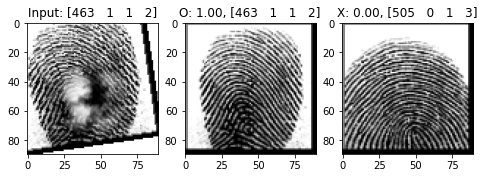

In [10]:
# new user fingerprint input
random_idx = random.randint(0, len(x_val))

random_img = x_val[random_idx]
random_label = label_val[random_idx]

seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-30, 30),
        order=[0, 1],
        cval=255
    )
], random_order=True)

random_img = seq.augment_image(random_img).reshape((1, 90, 90, 1)).astype(np.float32) / 255.

# matched image
match_key = random_label.astype(str)
match_key = ''.join(match_key).zfill(6)

rx = x_real[label_real_dict[match_key]].reshape((1, 90, 90, 1)).astype(np.float32) / 255.
ry = y_real[label_real_dict[match_key]]

pred_rx = model.predict([random_img, rx])

# unmatched image
unmatch_key, unmatch_idx = random.choice(list(label_real_dict.items()))

ux = x_real[unmatch_idx].reshape((1, 90, 90, 1)).astype(np.float32) / 255.
uy = y_real[unmatch_idx]

pred_ux = model.predict([random_img, ux])

plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img.squeeze(), cmap='gray')
plt.subplot(1, 3, 2)
plt.title('O: %.02f, %s' % (pred_rx, ry))
plt.imshow(rx.squeeze(), cmap='gray')
plt.subplot(1, 3, 3)
plt.title('X: %.02f, %s' % (pred_ux, uy))
plt.imshow(ux.squeeze(), cmap='gray')